<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Variable path pour l'importation
path =  "C:\\Users\\yannf\\OneDrive\\SWSetup\\Bureau\\Cours\\Formation_data_analyse\\projets\\projet_4\\input\\"

#Importation du fichier population.csv
data_p = pd.read_csv(path+"population.csv", sep=",")

#Importation du fichier dispo_alimentaire.csv
data_da = pd.read_csv(path+"dispo_alimentaire.csv", sep=",")

#Importation du fichier aide_alimentaire.csv
data_aa = pd.read_csv(path+"aide_alimentaire.csv", sep=",")

#Importation du fichier sous_nutrition.csv
data_sn = pd.read_csv(path+"sous_nutrition.csv", sep=",")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print(f"Le tableau comporte {data_p.shape[0]} lignes")
print(f"Le tableau comporte {data_p.shape[1]} colonne(s)")

Le tableau comporte 1416 lignes
Le tableau comporte 3 colonne(s)


In [4]:
#Fichier Population
#Consulter le nombre de colonnes et la nature des données
for col in data_p :
    print(f"Pour la colonne {col} les données sont de type : {data_p[col].dtype}")
    #Le nombre de valeurs présentes dans chacune des colonnes
    print(f"Il y a {pd.notnull(data_p[col]).sum()} valeurs")

Pour la colonne Zone les données sont de type : object
Il y a 1416 valeurs
Pour la colonne Année les données sont de type : int64
Il y a 1416 valeurs
Pour la colonne Valeur les données sont de type : float64
Il y a 1416 valeurs


In [5]:
#Affichage les 5 premières lignes de la table
data_p.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
data_p["Valeur"] *= 1000

In [7]:
#changement du nom de la colonne Valeur par Population
data_p.rename(columns={"Valeur":"Population"}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
data_p.head(5)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print(f"Le tableau comporte {data_da.shape[0]} lignes")
print(f"Le tableau comporte {data_da.shape[1]} colonne(s)")

Le tableau comporte 15605 lignes
Le tableau comporte 18 colonne(s)


In [10]:
#Fichier dispo_alimentaire
#Consulter le nombre de colonnes et la nature des données
for col in data_da :
    print(f"Pour la colonne {col} les données sont de type : {data_da[col].dtype}")
    #Le nombre de valeurs présentes dans chacune des colonnes
    print(f"Il y a {pd.notnull(data_da[col]).sum()} valeurs")

Pour la colonne Zone les données sont de type : object
Il y a 15605 valeurs
Pour la colonne Produit les données sont de type : object
Il y a 15605 valeurs
Pour la colonne Origine les données sont de type : object
Il y a 15605 valeurs
Pour la colonne Aliments pour animaux les données sont de type : float64
Il y a 2720 valeurs
Pour la colonne Autres Utilisations les données sont de type : float64
Il y a 5496 valeurs
Pour la colonne Disponibilité alimentaire (Kcal/personne/jour) les données sont de type : float64
Il y a 14241 valeurs
Pour la colonne Disponibilité alimentaire en quantité (kg/personne/an) les données sont de type : float64
Il y a 14015 valeurs
Pour la colonne Disponibilité de matière grasse en quantité (g/personne/jour) les données sont de type : float64
Il y a 11794 valeurs
Pour la colonne Disponibilité de protéines en quantité (g/personne/jour) les données sont de type : float64
Il y a 11561 valeurs
Pour la colonne Disponibilité intérieure les données sont de type : float

In [11]:
#Affichage les 5 premières lignes de la table
data_da.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
data_da.replace(to_replace=np.nan, value=0, inplace=True)

In [13]:
data_da.rename(columns={"Aliments pour animaux" : "Alim_anim",
                        "Disponibilité alimentaire (Kcal/personne/jour)": "Dispo_alim_kpj",
                        "Disponibilité alimentaire en quantité (kg/personne/an)" : "Dispo_alim_kpa",
                        "Disponibilité de matière grasse en quantité (g/personne/jour)" : "Dispo_matgras_gpj",
                        "Disponibilité de protéines en quantité (g/personne/jour)" : "Dispo_prot_gpj" }, inplace = True)      

In [14]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
for col in data_da :
    if data_da[col].dtype == "float64":
        data_da[col] = pd.to_numeric(data_da[col], errors="raise")
    if col not in ("Dispo_alim_kpj", "Dispo_alim_kpa", "Dispo_matgras_gpj", "Dispo_prot_gpj") and data_da[col].dtype == "float64":
        data_da[col] *= 1000000
        

In [15]:
#Affichage les 5 premières lignes de la table
data_da.head(5)

,Zone,Produit,Origine,Alim_anim,Autres Utilisations,Dispo_alim_kpj,Dispo_alim_kpa,Dispo_matgras_gpj,Dispo_prot_gpj,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [16]:
#Afficher les dimensions du dataset
print(f"Le tableau comporte {data_aa.shape[0]} lignes")
print(f"Le tableau comporte {data_aa.shape[1]} colonne(s)")

Le tableau comporte 1475 lignes
Le tableau comporte 4 colonne(s)


In [17]:
#Fichier aide_alimentaire
#Consulter le nombre de colonnes et la nature des données
for col in data_aa :
    print(f"Pour la colonne {col} les données sont de type : {data_aa[col].dtype}")
    #Le nombre de valeurs présentes dans chacune des colonnes
    print(f"Il y a {pd.notnull(data_aa[col]).sum()} valeurs")

Pour la colonne Pays bénéficiaire les données sont de type : object
Il y a 1475 valeurs
Pour la colonne Année les données sont de type : int64
Il y a 1475 valeurs
Pour la colonne Produit les données sont de type : object
Il y a 1475 valeurs
Pour la colonne Valeur les données sont de type : int64
Il y a 1475 valeurs


In [18]:
#Affichage les 5 premières lignes de la table
data_aa.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [19]:
#changement du nom de la colonne Pays bénéficiaire par Zone et Valeur par Aide_alimentaire
data_aa.rename(columns={"Pays bénéficiaire": "Zone", "Valeur" : "Aide_alimentaire"}, inplace=True)

In [20]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
data_aa["Aide_alimentaire"] *= 1000

In [21]:
#Affichage les 5 premières lignes de la table
data_aa.head(5)

,Zone,Année,Produit,Aide_alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [22]:
#Afficher les dimensions du dataset
print(f"Le tableau comporte {data_sn.shape[0]} lignes")
print(f"Le tableau comporte {data_sn.shape[1]} colonne(s)")

Le tableau comporte 1218 lignes
Le tableau comporte 3 colonne(s)


In [23]:
#Fichier sous_nutrition
#Consulter le nombre de colonnes et la nature des données
for col in data_sn :
    print(f"Pour la colonne {col} les données sont de type : {data_sn[col].dtype}")
    #Le nombre de valeurs présentes dans chacune des colonnes
    print(f"Il y a {pd.notnull(data_sn[col]).sum()} valeurs")

Pour la colonne Zone les données sont de type : object
Il y a 1218 valeurs
Pour la colonne Année les données sont de type : object
Il y a 1218 valeurs
Pour la colonne Valeur les données sont de type : object
Il y a 624 valeurs


In [24]:
#Afficher les 5 premières lignes de la table
data_sn.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [25]:
#Conversion de la colonne sous nutrition en numérique
data_sn['Valeur'] = pd.to_numeric(data_sn['Valeur'], errors="coerce")

In [26]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
data_sn["Valeur"].replace(to_replace=np.nan, value=0, inplace=True)

In [27]:
#changement du nom de la colonne Valeur par sous_nutrition
data_sn.rename(columns={"Valeur":"sous_nutrition"}, inplace=True)

In [28]:
#Multiplication de la colonne sous_nutrition par 1000000
data_sn["sous_nutrition"] *= 1000000

In [29]:
#Afficher les 5 premières lignes de la table
data_sn.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [30]:
#exemple
data_da.loc[(data_da["Zone"] == "Mexique") & (data_da["Produit"] == "Blé"),  ["Zone","Produit","Alim_anim"]]

,Zone,Produit,Alim_anim
9071,Mexique,Blé,67000000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [31]:
data_sn.replace(to_replace=["2012-2014"], value=2013, inplace=True)
data_sn.replace(to_replace=["2013-2015"], value=2014, inplace=True)
data_sn.replace(to_replace=["2014-2016"], value=2015, inplace=True)
data_sn.replace(to_replace=["2015-2017"], value=2016, inplace=True)
data_sn.replace(to_replace=["2016-2018"], value=2017, inplace=True)
data_sn.replace(to_replace=["2017-2019"], value=2018, inplace=True)
data_sn_2017 = data_sn.copy()

In [32]:
data_sn_2017 = data_sn_2017.loc[data_sn["Année"] == 2017]
data_sn_2017.drop(columns="Année", inplace = True)

In [33]:
data_p_2017 = data_p.copy()

In [34]:
data_p_2017 = data_p_2017.loc[data_p_2017["Année"] == 2017]
data_p_2017.drop(columns="Année", inplace = True)

In [35]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
data_p_sn_2017 = pd.merge(data_p_2017, data_sn_2017, on="Zone", how="inner", suffixes= ('_p', '_sn'))

In [36]:
#Affichage du dataset
data_p_sn_2017.head(10)

,Zone,Population,sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0
5,Andorre,77001.0,0.0
6,Angola,29816766.0,5800000.0
7,Antigua-et-Barbuda,95426.0,0.0
8,Arabie saoudite,33101179.0,1600000.0
9,Argentine,43937140.0,1500000.0


In [37]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
pop_monde = data_p_sn_2017['Population'].sum()
print(f"En 2017, il y a {data_p_sn_2017['sous_nutrition'].sum()/ 1000000} millions de personnes en état de sous nutrition dans le monde sur un total de {round(data_p_sn_2017['Population'].sum()/1000000000, 2)} milliards de personnes.")
print(f"Cela fait environ {round(data_p_sn_2017['sous_nutrition'].sum()/pop_monde*100,2)} % de la population.")

En 2017, il y a 535.7 millions de personnes en état de sous nutrition dans le monde sur un total de 7.54 milliards de personnes.
Cela fait environ 7.1 % de la population.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [38]:
#Combien mange en moyenne un être humain ? Source => 
#Inclusion d'un fichier contenant les minimaux et moyennes de calories par personnes par pays.
data_kcal = pd.read_csv(path+"min_avg_kcal.csv", sep=",")

In [39]:
#Récupération des apports moyens en calories
data_avg_kcal = data_kcal.loc[data_kcal["Produit"] == "Besoins énergétiques alimentaires moyens (kcal/personne/jour)"]
kcal_avg = round(data_avg_kcal["Valeur"].mean())

In [40]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
data_p_da_2017 = pd.merge(data_p_2017, data_da, on="Zone", how="inner", suffixes= ('_p', '_da'))

In [41]:
#Affichage du nouveau dataframe
data_p_da_2017.head(5)

,Zone,Population,Produit,Origine,Alim_anim,Autres Utilisations,Dispo_alim_kpj,Dispo_alim_kpa,Dispo_matgras_gpj,Dispo_prot_gpj,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
data_p_da_2017["dispo_kcal"] = 0
#Creation d'un dataframe récapitulatif avec une ligne par pays
dk_zone  = data_p_da_2017.groupby(["Zone"])["Dispo_alim_kpj"].sum()
for Zone in data_p_da_2017["Zone"].unique() :
    data_p_da_2017.loc[data_p_da_2017["Zone"] == Zone, "dispo_kcal"] = dk_zone[Zone]

In [43]:
dk_zone = pd.merge(data_p_2017, dk_zone, on="Zone", how="inner")

In [44]:
for i in range(len(dk_zone)):
    dk_zone.loc[dk_zone.index == i , 'total_kcal'] = dk_zone['Population'][i]*dk_zone['Dispo_alim_kpj'][i]

In [45]:
#Calcul du nombre d'humains pouvant être nourris
humain_nourris = dk_zone['total_kcal'].sum() / kcal_avg
print(f'Avec toute les produits disponibles dans le monde, il y aurait assez de calories pour nourrir {round(humain_nourris/1000000000,2)} milliard de personnes.')
print(f'Cela représente {round(100*humain_nourris/pop_monde,1)}% de la population mondiale.')

Avec toute les produits disponibles dans le monde, il y aurait assez de calories pour nourrir 8.83 milliard de personnes.
Cela représente 117.1% de la population mondiale.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [46]:
#Transfert des données avec les végétaux dans un nouveau dataframe
#Vérification que toutes les origines sont soit animales soit végétales
data_vege_2017 = data_p_da_2017.loc[data_p_da_2017["Origine"] == "vegetale"]

In [47]:
#Calcul du nombre de kcal disponible pour les végétaux
data_vege_2017.loc[data_vege_2017["dispo_kcal"] != 0, "dispo_kcal"] = 0
#Creation d'un dataframe récapitulatif avec une ligne par pays
dk_vege_zone  = data_vege_2017.groupby(["Zone"])["Dispo_alim_kpj"].sum()
for Zone in data_vege_2017["Zone"].unique() :
    data_vege_2017.loc[data_vege_2017["Zone"] == Zone, "dispo_kcal"] = dk_vege_zone[Zone]

In [48]:
dk_vege_zone = pd.merge(data_p_2017, dk_vege_zone, on="Zone", how="inner")

In [49]:
for i in range(len(dk_vege_zone)) :
    dk_vege_zone.loc[dk_vege_zone.index == i, 'dispo_kcal'] =  dk_vege_zone['Population'][i]*dk_vege_zone['Dispo_alim_kpj'][i]
dk_vege_zone.head()

,Zone,Population,Dispo_alim_kpj,dispo_kcal
0,Afghanistan,36296113.0,1871.0,6.791003e+10
1,Afrique du Sud,57009756.0,2533.0,1.444057e+11
2,Albanie,2884169.0,2203.0,6.353824e+09
3,Algérie,41389189.0,2915.0,1.206495e+11
4,Allemagne,82658409.0,2461.0,2.034223e+11


In [50]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
humain_nourris_veg = dk_vege_zone['dispo_kcal'].sum() / kcal_avg
print(f'Avec toute les végétaux disponibles dans le monde, il y aurait assez de calories pour nourrir {round(humain_nourris_veg/1000000000,2)} milliard de personnes.')
print(f'Cela représente {round(100*humain_nourris_veg/pop_monde,1)}% de la population mondiale.')

Avec toute les végétaux disponibles dans le monde, il y aurait assez de calories pour nourrir 7.29 milliard de personnes.
Cela représente 96.6% de la population mondiale.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [51]:
#Calcul de la disponibilité totale
data_da_zone = data_da.groupby(['Zone'], as_index=False).sum(numeric_only=True)
data_da_zone.head()

,Zone,Alim_anim,Autres Utilisations,Dispo_alim_kpj,Dispo_alim_kpa,Dispo_matgras_gpj,Dispo_prot_gpj,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,7.680000e+08,4.150000e+08,2087.0,351.41,33.50,58.26,1.351500e+10,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,3.950000e+08,6.300000e+07,-3.680000e+08
1,Afrique du Sud,5.309000e+09,8.760000e+08,3020.0,564.80,83.58,85.33,6.125600e+10,1.167400e+10,7.517000e+09,2.981200e+10,2.193000e+09,6.326300e+10,2.530000e+08,2.281900e+10,2.153000e+09
2,Albanie,6.600000e+08,1.740000e+08,3188.0,1095.54,106.48,111.37,4.758000e+09,9.400000e+07,9.330000e+08,3.476000e+09,2.760000e+08,3.964000e+09,5.500000e+07,1.130000e+08,-4.500000e+07
3,Algérie,4.352000e+09,1.707000e+09,3293.0,809.13,76.48,91.92,4.263000e+10,6.550000e+08,1.740300e+10,3.172900e+10,3.753000e+09,2.635900e+10,4.490000e+08,6.370000e+08,-4.790000e+08
4,Allemagne,3.020900e+10,7.711000e+09,3503.0,957.52,141.62,101.39,1.622750e+11,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-1.920000e+08


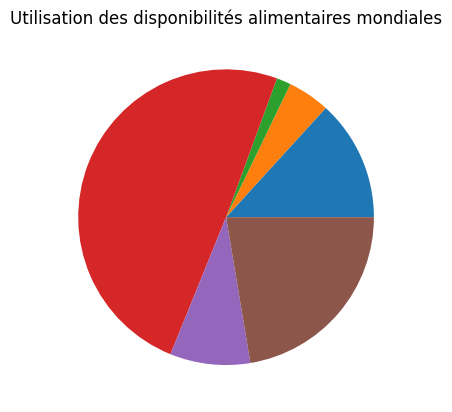

In [52]:
Zone_total = pd.DataFrame({"Alimentation animale" : [data_da_zone["Alim_anim"].sum()],
                     "Pertes" : data_da_zone["Pertes"].sum(),
                     "Semences" : data_da_zone["Semences"].sum(),
                     "Nourriture" : data_da_zone["Nourriture"].sum(),
                     "Autres Utilisations" : data_da_zone["Autres Utilisations"].sum(),
                     "Traitement" : data_da_zone["Traitement"].sum()
                    })

plt.pie(Zone_total.values[0], textprops={'fontsize':8, "color":"#001d6a"})
plt.title("Utilisation des disponibilités alimentaires mondiales")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [53]:
#Création d'une liste avec toutes les variables
data_p_da_2017["Produit"].unique()
#Liste de toutes les céréales
list_cer = ["Blé", "Céréales, Autres", "Maïs", "Millet", "Orge", "Riz (Eq Blanchi)", "Avoine" ,"Seigle", "Sorgho"]

In [54]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
data_cer_da_2017 = data_p_da_2017.loc[data_p_da_2017["Produit"].isin(list_cer)]

In [55]:
#Affichage de la proportion d'utilisation des céréales pour l'alimentation animale
print(data_cer_da_2017["Alim_anim"].sum() / data_cer_da_2017["Disponibilité intérieure"].sum() *100)

36.14301553458228


In [56]:
data_cer_da_2017.head()

,Zone,Population,Produit,Origine,Alim_anim,Autres Utilisations,Dispo_alim_kpj,Dispo_alim_kpa,Dispo_matgras_gpj,Dispo_prot_gpj,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
7,Afghanistan,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,2087
12,Afghanistan,36296113.0,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2087
32,Afghanistan,36296113.0,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,2087
34,Afghanistan,36296113.0,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,2087
40,Afghanistan,36296113.0,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,2087


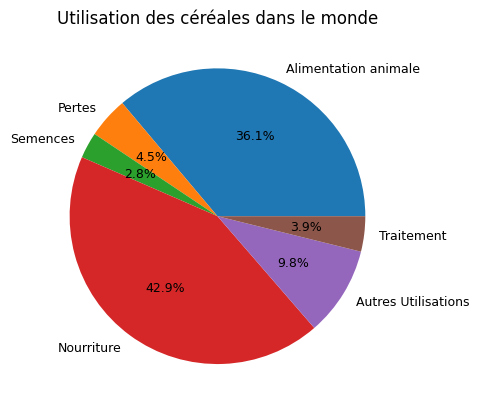

In [57]:
data_cer_da_2017_zone = data_cer_da_2017.groupby(['Produit']).sum(numeric_only=True)
data_cer_da_2017_zone.head()
Zone_total_cer = pd.DataFrame({"Alimentation animale" : [data_cer_da_2017_zone["Alim_anim"].sum()],
                     "Pertes" : data_cer_da_2017_zone["Pertes"].sum(),
                     "Semences" : data_cer_da_2017_zone["Semences"].sum(),
                     "Nourriture" : data_cer_da_2017_zone["Nourriture"].sum(),
                     "Autres Utilisations" : data_cer_da_2017["Autres Utilisations"].sum(),
                     "Traitement" : data_cer_da_2017_zone["Traitement"].sum()
                    })
plt.pie(Zone_total_cer.values[0] , labels=Zone_total_cer.columns, autopct='%1.1f%%', textprops={'fontsize':9})
plt.title("Utilisation des céréales dans le monde")
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017 et entre 2013 et 2018</h3>
</div>

In [58]:
#Création de la colonne proportion par pays
data_sn_p = pd.merge(data_p,data_sn, on= ["Zone", "Année"], how="inner")
data_sn_p["Proportion"] = 0
#Calcul de la proportion
for i in range(len(data_sn_p)) :
    data_sn_p.loc[data_sn_p.index == i,"Proportion"] = data_sn_p["sous_nutrition"][i] / data_sn_p["Population"][i]

In [59]:
#Ajout d'une colonne avg pour la moyenne de sous alimentation de 
data_sn_p["avg"] = 0
for Zone in data_sn_p["Zone"].unique():
    data_sn_p.loc[data_sn_p["Zone"] == Zone, "avg"] = data_sn_p.loc[data_sn_p["Zone"] == Zone, "Proportion"].mean()

In [60]:
#affichage après trie des 10 pires pays en 2017
data_sn_p_2017_t10 = data_sn_p.loc[data_sn_p["Année"] == 2017, ["Zone", "Proportion"]].sort_values(['Proportion'], ascending=False).head(10)
data_sn_p_2017_t10["Proportion"] = round(data_sn_p_2017_t10["Proportion"],3) *100
data_sn_p_2017_t10_2 = data_sn_p_2017_t10.copy()
data_sn_p_2017_t10_2.loc[data_sn_p_2017_t10_2["Zone"] == "République populaire démocratique de Corée", "Zone"] = "Corée du Nord"

In [61]:
data_sn_p.loc[data_sn_p["Année"] == 2017].sort_values(['Proportion'], ascending = False).head(10)['sous_nutrition'].sum()

60600000.0

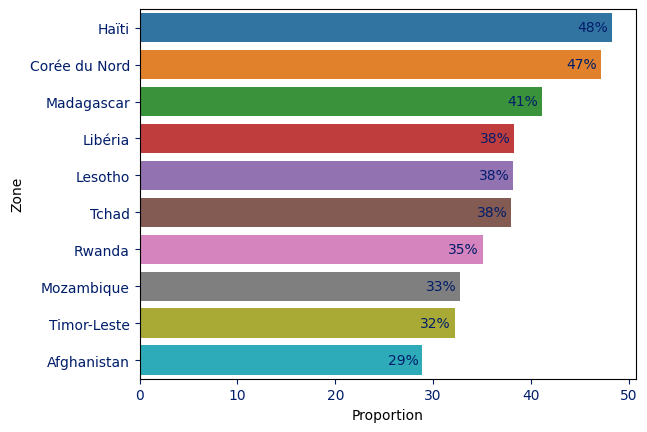

In [62]:
ax = sns.barplot(data_sn_p_2017_t10_2, x="Proportion", y="Zone", orient="h")
pourcentages = [f"{round(i)}%" for i in data_sn_p_2017_t10['Proportion']]
ax.tick_params(colors="#001d6a")
ax.bar_label(ax.containers[0], pourcentages, fontsize=10, padding=-25, color="#001d6a");

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [63]:
#calcul du total de l'aide alimentaire par pays
data_aa_total = data_aa.groupby(['Zone'], as_index=False)['Aide_alimentaire'].sum()

In [64]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
data_aa_total.sort_values(["Aide_alimentaire"], ascending=False, inplace=True)
data_aa_total_t10 = data_aa_total.head(10)
data_aa_total_t10

,Zone,Aide_alimentaire
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


In [65]:
data_aa_total.head(20)

,Zone,Aide_alimentaire
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


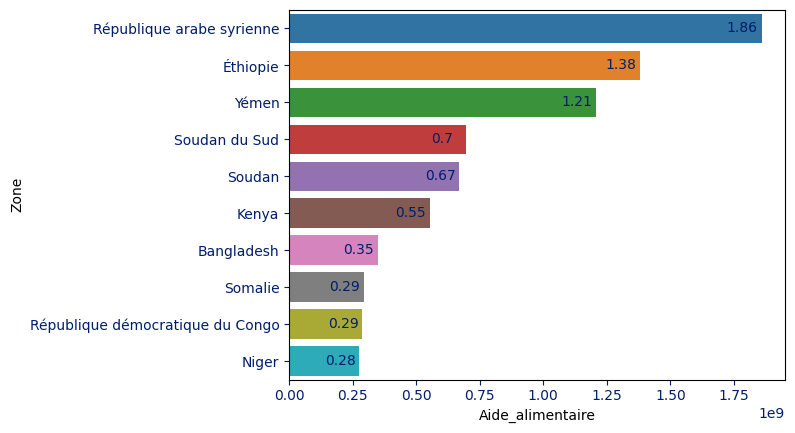

In [66]:
ax = sns.barplot(data_aa_total_t10, x="Aide_alimentaire", y="Zone", orient="h")
pourcentages = [f"{round(i/1000000000,2)}" for i in data_aa_total_t10['Aide_alimentaire']]
ax.tick_params(colors="#001d6a")
ax.bar_label(ax.containers[0], pourcentages, padding=-25, fontsize=10, color="#001d6a");

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [67]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
data_aa_top5 = data_aa.copy()
data_aa_top5.drop(columns='Produit', inplace=True)
# data_aa_top5 = data_aa_top5.groupby(['Zone', 'Année'], as_index = False)['Aide_alimentaire'].sum(numeric_only = True)
data_aa_top5_2 = data_aa_top5.groupby(["Zone", "Année"], as_index=False).sum(numeric_only = True)
data_aa_top5_2.groupby(["Zone"], as_index=False)["Aide_alimentaire"].sum(numeric_only = True)
list_top5 = data_aa_top5_2.sort_values(["Aide_alimentaire"], ascending = False)["Zone"].unique()[0:5]

In [68]:
#On filtre sur le dataframe avec notre liste
data_aa_top5_2 = data_aa_top5_2.loc[data_aa_top5_2["Zone"].isin(list_top5)]
data_aa_top5_2

,Zone,Année,Aide_alimentaire
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [69]:
data_aa_sn_top5 = pd.merge(data_aa_top5_2, data_sn, on = ["Zone", "Année"], how="inner")
data_aa_sn_top5 = data_aa_sn_top5.pivot_table(index="Zone", columns = "Année", values="Aide_alimentaire")
data_aa_sn_top5[data_aa_sn_top5.isnull()] = 0
data_aa_sn_top5

Année,2013,2014,2015,2016
Zone,,,,
République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0
Soudan,330230000.0,321904000.0,17650000.0,0.0
Soudan du Sud,196330000.0,450610000.0,48308000.0,0.0
Yémen,264764000.0,103840000.0,372306000.0,465574000.0
Éthiopie,591404000.0,586624000.0,203266000.0,0.0


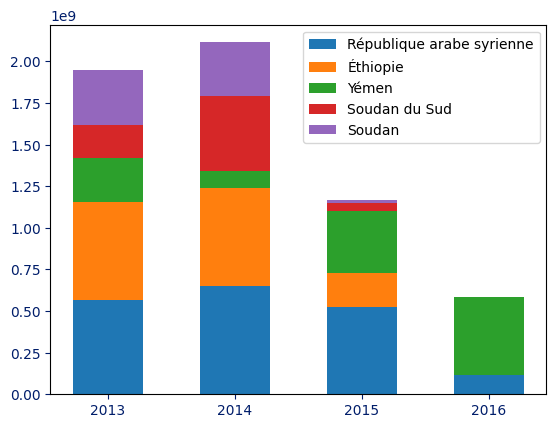

In [70]:
labels = list(data_aa_sn_top5.columns)
labels = list(map(str, labels))

    
width = 0.55
fig, ax = plt.subplots()

pays1 = data_aa_sn_top5.loc[data_aa_sn_top5.index == list_top5[0]].values
pays2 = data_aa_sn_top5.loc[data_aa_sn_top5.index == list_top5[1]].values
pays3 = data_aa_sn_top5.loc[data_aa_sn_top5.index == list_top5[2]].values
pays4 = data_aa_sn_top5.loc[data_aa_sn_top5.index == list_top5[3]].values
pays5 = data_aa_sn_top5.loc[data_aa_sn_top5.index == list_top5[4]].values
ax.bar(labels, pays1[0], width, label = list_top5[0])
ax.bar(labels, pays2[0], width, label = list_top5[1], bottom= np.array(pays1[0]))
ax.bar(labels, pays3[0], width, label = list_top5[2], bottom= np.array(pays1[0]) + np.array(pays2[0]))
ax.bar(labels, pays4[0], width, label = list_top5[3], bottom= np.array(pays1[0]) + np.array(pays2[0]) + np.array(pays3[0]))
ax.bar(labels, pays5[0], width, label = list_top5[4], bottom= np.array(pays1[0]) + np.array(pays2[0]) + np.array(pays3[0]) + np.array(pays4[0]))

# ax.set_ylabel('Aide_alimentaire')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
# ax.set_xlabel("Année")
# ax.set_title('Aide alimentaire entre 2013 et 2016')
ax.tick_params(colors="#001d6a")
ax.legend()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [71]:
#Calcul de la disponibilité en kcal par personne par jour par pays
data_da_zone.head()

,Zone,Alim_anim,Autres Utilisations,Dispo_alim_kpj,Dispo_alim_kpa,Dispo_matgras_gpj,Dispo_prot_gpj,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,7.680000e+08,4.150000e+08,2087.0,351.41,33.50,58.26,1.351500e+10,2.780000e+08,2.988000e+09,1.073500e+10,1.135000e+09,1.117100e+10,3.950000e+08,6.300000e+07,-3.680000e+08
1,Afrique du Sud,5.309000e+09,8.760000e+08,3020.0,564.80,83.58,85.33,6.125600e+10,1.167400e+10,7.517000e+09,2.981200e+10,2.193000e+09,6.326300e+10,2.530000e+08,2.281900e+10,2.153000e+09
2,Albanie,6.600000e+08,1.740000e+08,3188.0,1095.54,106.48,111.37,4.758000e+09,9.400000e+07,9.330000e+08,3.476000e+09,2.760000e+08,3.964000e+09,5.500000e+07,1.130000e+08,-4.500000e+07
3,Algérie,4.352000e+09,1.707000e+09,3293.0,809.13,76.48,91.92,4.263000e+10,6.550000e+08,1.740300e+10,3.172900e+10,3.753000e+09,2.635900e+10,4.490000e+08,6.370000e+08,-4.790000e+08
4,Allemagne,3.020900e+10,7.711000e+09,3503.0,957.52,141.62,101.39,1.622750e+11,5.743100e+10,6.535300e+10,7.923800e+10,3.781000e+09,1.545470e+11,1.551000e+09,3.984200e+10,-1.920000e+08


In [72]:
#Nouvelle version du dataframe avec les disponibilités alimentaire par zone, sans zone en tant qu'index
data_da_zone = data_p_da_2017.copy()
data_da_zone.drop(["Produit", "Origine", "Population", "dispo_kcal"], axis=1, inplace=True)
data_da_zone = data_da_zone.groupby(["Zone"], as_index =False ).sum(numeric_only=False)

In [73]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
data_da_zone.sort_values(['Dispo_alim_kpj'], ascending=True, inplace=True)
data_da_zone.index = range(1, len(data_da_zone)+1)
data_da_zone_bot10 = data_da_zone.loc[:, ["Zone","Dispo_alim_kpj"]][0:10].sort_values(["Dispo_alim_kpj"], ascending=False)
data_kcal_avg = pd.DataFrame({"Zone":"Seuil sous nutrition", "Dispo_alim_kpj":[kcal_avg]})
data_kcal_avg
data_da_zone_bot10 = pd.concat([data_da_zone_bot10, data_kcal_avg])
data_da_zone_bot10_2 = data_da_zone_bot10.copy()
data_da_zone_bot10_2.loc[data_da_zone_bot10_2["Zone"] == "République populaire démocratique de Corée", "Zone"] = "Corée du Nord"

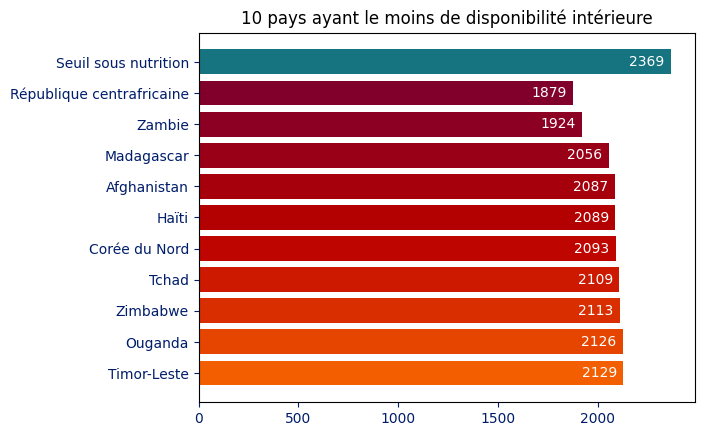

In [74]:
#échelle de couleur pour marquer le peu de disponibilité intérieure
bar_colors = ['#F25E00', '#E64500', '#D92E00', '#CC1900', '#BF0500', '#B30000', '#A6000C', '#990018', '#8C0023', '#80002B', '#167481']
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne en comparaison des apports en calories moyen
fig, ax = plt.subplots()
ax.set_title("10 pays ayant le moins de disponibilité intérieure")
kcal = [int(i) for i in data_da_zone_bot10_2["Dispo_alim_kpj"]]
ax.tick_params(colors="#001d6a")
ax.barh(data_da_zone_bot10_2["Zone"], data_da_zone_bot10_2["Dispo_alim_kpj"], color=bar_colors)
ax.bar_label(ax.containers[0], kcal, padding=-30, fontsize=10, color="#FFFFFF");

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [75]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
data_da_zone.sort_values(["Dispo_alim_kpj"], ascending=False, inplace=True)
data_da_zone[0:10]
data_da_zone_top10 = data_da_zone[["Zone", "Dispo_alim_kpj"]][0:10].sort_values(["Dispo_alim_kpj"], ascending=True)
data_da_zone_top10
data_da_zone_top10 = pd.concat([data_da_zone_top10, data_kcal_avg])

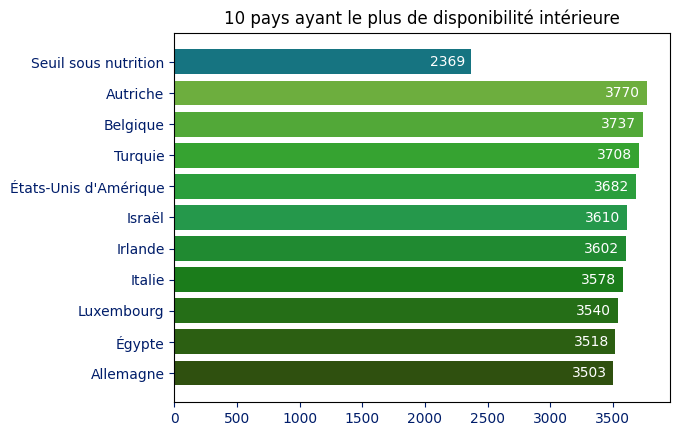

In [76]:
#échelle de couleur pour marquer l'abondance de disponibilité intérieure
bar_colors = ['#2F500F','#2C5F12','#256E17','#1B7C1B','#208A31','#25984B','#2B9E3C','#36A331','#52A838','#6DAE3E','#167481']
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne en comparaison des apports en calories moyen
fig, ax = plt.subplots()
ax.set_title("10 pays ayant le plus de disponibilité intérieure")
kcal = [int(i) for i in data_da_zone_top10["Dispo_alim_kpj"]]
ax.tick_params(colors="#001d6a")
ax.barh(data_da_zone_top10["Zone"], data_da_zone_top10["Dispo_alim_kpj"], color=bar_colors)
ax.bar_label(ax.containers[0], kcal, padding=-30, fontsize=10, color="#FFFFFF");

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [77]:
#Creation d'un dataframe avec uniquement la Thaïlande
data_da_thailande = data_da.loc[data_da["Zone"] == "Thaïlande"]
data_da_thailande.head()

,Zone,Produit,Origine,Alim_anim,Autres Utilisations,Dispo_alim_kpj,Dispo_alim_kpa,Dispo_matgras_gpj,Dispo_prot_gpj,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000000.0,5.000000e+06,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000000.0,6.000000e+06,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,0.00,358000000.0,1.100000e+08,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000000.0,7.000000e+06,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000000.0,1.449000e+09,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0


In [78]:
#Calcul de la sous nutrition en Thaïlande
pop_thailande = data_p.loc[(data_p["Zone"] == "Thaïlande"), ["Population", "Année"]]
data_sn_thailande = data_sn.loc[data_sn["Zone"] == "Thaïlande"]
sn_thailande = pd.merge(data_sn_thailande, pop_thailande, on="Année", how="inner")
sn_thailande["Proportion"] = 0
for i in range(len(sn_thailande)) :
    sn_thailande.loc[sn_thailande.index == i,"Proportion"] = sn_thailande["sous_nutrition"][i] / sn_thailande["Population"][i]
sn_thailande

,Zone,Année,sous_nutrition,Population,Proportion
0,Thaïlande,2013,6200000.0,68144518.0,0.090983
1,Thaïlande,2014,6000000.0,68438746.0,0.087670
2,Thaïlande,2015,5900000.0,68714511.0,0.085863
3,Thaïlande,2016,6000000.0,68971308.0,0.086993
4,Thaïlande,2017,6200000.0,69209810.0,0.089583
5,Thaïlande,2018,6500000.0,69428453.0,0.093622


In [79]:
# On calcule la proportion exportée en fonction de la proportion
thailande_total = data_da_thailande.groupby(["Zone"]).sum(numeric_only=True)
thailande_manioc = data_da_thailande.loc[data_da_thailande["Produit"] == "Manioc"]
print(f"La Thaïlande exporte {round((thailande_manioc['Exportations - Quantité']/ thailande_manioc['Production']).unique()[0],2)*100}% de sa production de manioque alors que {round(sn_thailande['Proportion'].mean()*100, 1)}% de sa population est en état de sous-nutrition")

La Thaïlande exporte 83.0% de sa production de manioque alors que 8.9% de sa population est en état de sous-nutrition


In [80]:
#Ajout en disponibilité kcal par habitant sans exportations
kcal_manioc_exp = round((thailande_manioc['Dispo_alim_kpj'] * (thailande_manioc['Exportations - Quantité'] /thailande_manioc['Nourriture'])).unique()[0])- thailande_manioc['Dispo_alim_kpj'].unique()[0]
print(f"Si la Thaïlande n'exportait pas tout son manioc elle pourrait augmenter ses disponibilités calorique quotidienne de {kcal_manioc_exp} kcal par personne \n soit {round(kcal_manioc_exp / kcal_avg*100 , 2)} % des apports moyen en énergie ")

Si la Thaïlande n'exportait pas tout son manioc elle pourrait augmenter ses disponibilités calorique quotidienne de 1118.0 kcal par personne 
 soit 47.19 % des apports moyen en énergie 


In [81]:
kcal_manioc_exp = round((thailande_manioc['Dispo_alim_kpj'] * (thailande_manioc['Exportations - Quantité'] /thailande_manioc['Nourriture']).unique()[0])- thailande_manioc['Dispo_alim_kpj'].unique()[0]).values[0]
kcal_avg_thailande = round(kcal_avg*(1-sn_thailande.loc[sn_thailande['Année'] == 2017]['Proportion']).unique()[0])
print(f'Pour rappel, un humain a besoin en moyenne de {kcal_avg} kcal par jour pour ne pas être en état de sous nutrition')
print(f"En Thailande les habitants n'ingèrent en moyenne que {kcal_avg_thailande} kcal")
print(f"Cela signifie que seul une réduction de {round(100/(kcal_manioc_exp/(kcal_avg -kcal_avg_thailande)))}% des exportations en manioc suffirait a subvenir aux besoins des habitants en état de sous nutrition")

Pour rappel, un humain a besoin en moyenne de 2369 kcal par jour pour ne pas être en état de sous nutrition
En Thailande les habitants n'ingèrent en moyenne que 2157 kcal
Cela signifie que seul une réduction de 19% des exportations en manioc suffirait a subvenir aux besoins des habitants en état de sous nutrition


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [82]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

In [83]:
#importations de dataframe issus du site FAO
data_ameriques = pd.read_csv(path+"ameriques.csv", sep=",")
data_asie = pd.read_csv(path+"asie.csv", sep=",")
data_afrique = pd.read_csv(path+"afrique.csv", sep=",")
data_oceanie = pd.read_csv(path+"oceanie.csv", sep=",")
data_europe = pd.read_csv(path+"europe.csv", sep=",")

In [84]:
#création de liste de pays pour chaque continent (=region du monde)
list_pays_am = data_ameriques["Zone"]
list_pays_as = data_asie["Zone"]
list_pays_af = data_afrique["Zone"]
list_pays_oc = data_oceanie["Zone"]
list_pays_eu = data_europe["Zone"]
#modification d'un nom de pays qui était différent entre la liste de pays et les autres dataframe
list_pays_eu.replace(to_replace="Pays-Bas (Royaume des)", value="Pays-Bas", inplace=True)

In [85]:
#ajout d'une colonne continent
data_sn_2017["continent"] = 0
data_sn_2017.loc[data_sn_2017["Zone"].isin(list_pays_am), "continent"] = "Ameriques"
data_sn_2017.loc[data_sn_2017["Zone"].isin(list_pays_as), "continent"] = "Asie"
data_sn_2017.loc[data_sn_2017["Zone"].isin(list_pays_af), "continent"] = "Afrique"
data_sn_2017.loc[data_sn_2017["Zone"].isin(list_pays_oc), "continent"] = "Oceanie"
data_sn_2017.loc[data_sn_2017["Zone"].isin(list_pays_eu), "continent"] = "Europe"

In [86]:
#concentration sur 2017, creation du dataframe contenant la sous nutrition et la population par pays pour 2017
data_sn_p_2017 = pd.merge(data_sn_2017, data_p_2017, on = "Zone", how="inner")

In [87]:
#agregation des valeurs par continent
data_continent = data_sn_p_2017.groupby(["continent"], as_index=False).sum(numeric_only=True)

In [88]:
#ajout d'une colonne proportion de sous nutrition
data_continent["Proportion"]=0
for continent in data_continent["continent"].unique():
    sn = data_continent.loc[data_continent["continent"]==continent, "sous_nutrition"]
    pop = data_continent.loc[data_continent["continent"]==continent, "Population"]
    data_continent.loc[data_continent["continent"]==continent, "Proportion"] = sn/pop

In [89]:
#ajout de colonne pour le compte de pays par continent et le compte de pays connaissant la sous nutrition
data_continent["count"] = 0
data_continent["count_sn"] = 0
for continent in data_continent["continent"].unique():
    count = data_sn_p_2017.loc[data_sn_p_2017["continent"] == continent, "continent"].count()
    count_sn = data_sn_p_2017.loc[(data_sn_p_2017["continent"] == continent) & (data_sn_p_2017["sous_nutrition"] !=0), "Zone"].count()
    data_continent.loc[data_continent["continent"] == continent, "count"] = count
    data_continent.loc[data_continent["continent"] == continent, "count_sn"] = count_sn
data_continent

,continent,sous_nutrition,Population,Proportion,count,count_sn
0,Afrique,148600000.0,1.242535e+09,0.119594,54,33
1,Ameriques,39600000.0,9.964807e+08,0.039740,38,18
2,Asie,345000000.0,4.519040e+09,0.076344,51,28
3,Europe,2500000.0,7.449698e+08,0.003356,40,5
4,Oceanie,0.0,4.077376e+07,0.000000,20,0


In [103]:
len(data_sn_p_2017)

203